In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
df=pd.read_csv('data/fashion-mnist_train.csv')
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
data=df.as_matrix()

In [0]:
x=data[:,1:]
y=data[:,0]

In [39]:
x.shape

(60000, 784)

In [0]:
x_train=x.reshape(-1,28,28,1)

In [0]:
x_train=x_train/255

In [42]:
x.shape

(60000, 784)

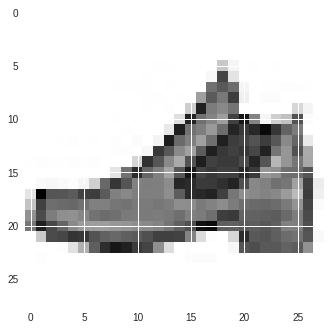

In [43]:
plt.imshow(x[1].reshape(28,28))

In [0]:
from keras.utils.np_utils import to_categorical

In [0]:
y_train=to_categorical(y)

In [0]:
df_test = pd.read_csv('data/fashion-mnist_test.csv')

In [47]:
df_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
df_test.shape

(10000, 785)

In [0]:
df_test=df_test.as_matrix()

In [0]:
x_test=df_test[:,1:]
y_test=df_test[:,0]

In [0]:
x_test=x_test.reshape(-1,28,28,1)

In [0]:
y_test = to_categorical(y_test)

In [0]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Activation,BatchNormalization,Flatten,Dropout,MaxPooling2D
from keras.optimizers import Adam,RMSprop,SGD

In [0]:
model=Sequential()

model.add(Conv2D(32,kernel_size=(3, 3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.0001),metrics=['accuracy'])

In [56]:
model.fit(x_train,y_train,epochs=70,batch_size=512,validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/70
60000/60000 [==============================] - 6s 101us/step - loss: 1.6113 - acc: 0.4260 - val_loss: 4.7421 - val_acc: 0.6989
Epoch 2/70
60000/60000 [==============================] - 5s 90us/step - loss: 0.9342 - acc: 0.6681 - val_loss: 4.2030 - val_acc: 0.7341
Epoch 3/70
60000/60000 [==============================] - 5s 90us/step - loss: 0.7903 - acc: 0.7185 - val_loss: 3.6431 - val_acc: 0.7686
Epoch 4/70
60000/60000 [==============================] - 5s 90us/step - loss: 0.7183 - acc: 0.7427 - val_loss: 3.4157 - val_acc: 0.7834
Epoch 5/70
60000/60000 [==============================] - 5s 89us/step - loss: 0.6776 - acc: 0.7554 - val_loss: 3.1289 - val_acc: 0.8022
Epoch 6/70
60000/60000 [==============================] - 5s 89us/step - loss: 0.6447 - acc: 0.7687 - val_loss: 3.0142 - val_acc: 0.8086
Epoch 7/70
60000/60000 [==============================] - 5s 89us/step - loss: 0.6227 - acc: 0.7782 - val_loss: 2.9470 - val_ac

In [57]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 120us/step


[2.0308554361768802, 0.8691]